Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Rescaling

# Load data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/'

Mounted at /content/gdrive


In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(root_path + "Train/")
data_dir_test = pathlib.Path(root_path + "Test/")

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

1818
118


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    color_mode='rgb', batch_size=batch_size, image_size=(img_height, img_width), shuffle=True, seed=123,
    validation_split=0.2, subset='training')

Found 1818 files belonging to 9 classes.
Using 1455 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, labels='inferred', label_mode='categorical',
    color_mode='rgb', batch_size=batch_size, image_size=(img_height, img_width), shuffle=True, seed=123,
    validation_split=0.2, subset='validation')

Found 1818 files belonging to 9 classes.
Using 363 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data

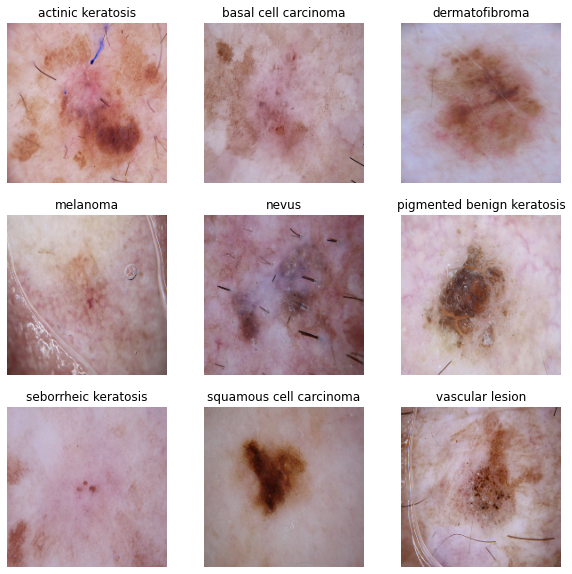

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import load_files 
from keras.utils import np_utils


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Create model

In [ ]:
num_classes = 9
epochs = 12

Model 1

In [ ]:
model = Sequential()
model.add(Rescaling(scale = 1./255, input_shape = (img_height,img_width,3))),
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                        

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
46/46 [==============================] - 430s 7s/step - loss: 6.5061 - accuracy: 0.3113 - val_loss: 5.9567 - val_accuracy: 0.0909
Epoch 2/20
46/46 [==============================] - 311s 7s/step - loss: 0.7634 - accuracy: 0.3230 - val_loss: 23.9362 - val_accuracy: 0.2094
Epoch 3/20
46/46 [==============================] - 308s 7s/step - loss: 0.4223 - accuracy: 0.3079 - val_loss: 25.7998 - val_accuracy: 0.0882
Epoch 4/20
46/46 [==============================] - 316s 7s/step - loss: 0.3528 - accuracy: 0.3773 - val_loss: 22.7443 - val_accuracy: 0.1350
Epoch 5/20
46/46 [==============================] - 305s 7s/step - loss: 0.3372 - accuracy: 0.3869 - val_loss: 21.9627 - val_accuracy: 0.0771
Epoch 6/20
46/46 [==============================] - 313s 7s/step - loss: 0.3132 - accuracy: 0.4371 - val_loss: 24.9589 - val_accuracy: 0.0579
Epoch 7/20
46/46 [==============================] - 305s 7s/step - loss: 0.3105 - accuracy: 0.4302 - val_loss: 17.9587 - val_accuracy: 0.0882
Epoch 8

Plot accuracy and loss function for Model 1

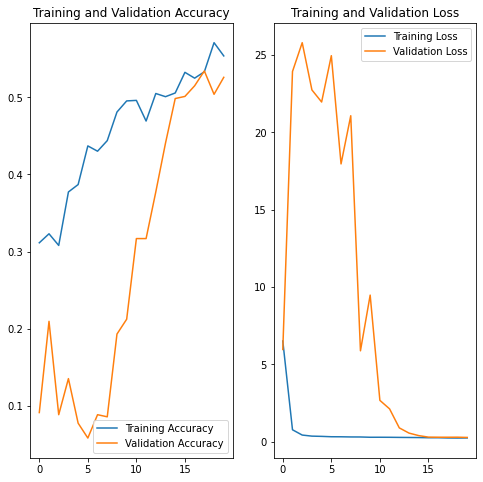

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model shows signs of over-fitting. Training accuracy is far better than validation accuracy.

Data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [ ]:
#for img in train_ds.take(1):
    #ax = plt.subplot(3, 3, i + 1)
 #   aug_img = data_augmentation(img)
 #   plt.imshow(aug_img)
# show the figure
#plt.show()

Model 2

In [ ]:
model2 = Sequential()
model2.add(Rescaling(scale = 1./255, input_shape = (img_height,img_width,3))),
model2.add(data_augmentation)
model2.add(Conv2D(32, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model2.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_3 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 batch_normalization_4 (Batc  (None, 180, 180, 32)     128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      9248      
                                                      

In [ ]:
epochs2 = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs2
)

Epoch 1/20
46/46 [==============================] - 322s 7s/step - loss: 6.9912 - accuracy: 0.2811 - val_loss: 2.7548 - val_accuracy: 0.2121
Epoch 2/20
46/46 [==============================] - 310s 7s/step - loss: 1.1821 - accuracy: 0.3388 - val_loss: 34.6329 - val_accuracy: 0.0634
Epoch 3/20
46/46 [==============================] - 316s 7s/step - loss: 0.4376 - accuracy: 0.3223 - val_loss: 51.4094 - val_accuracy: 0.0110
Epoch 4/20
46/46 [==============================] - 310s 7s/step - loss: 0.3811 - accuracy: 0.3299 - val_loss: 47.8592 - val_accuracy: 0.0248
Epoch 5/20
46/46 [==============================] - 310s 7s/step - loss: 0.3675 - accuracy: 0.3223 - val_loss: 57.2236 - val_accuracy: 0.0110
Epoch 6/20
46/46 [==============================] - 308s 7s/step - loss: 0.3506 - accuracy: 0.3753 - val_loss: 50.6747 - val_accuracy: 0.0083
Epoch 7/20
46/46 [==============================] - 310s 7s/step - loss: 0.3318 - accuracy: 0.3959 - val_loss: 52.7571 - val_accuracy: 0.0248
Epoch 8

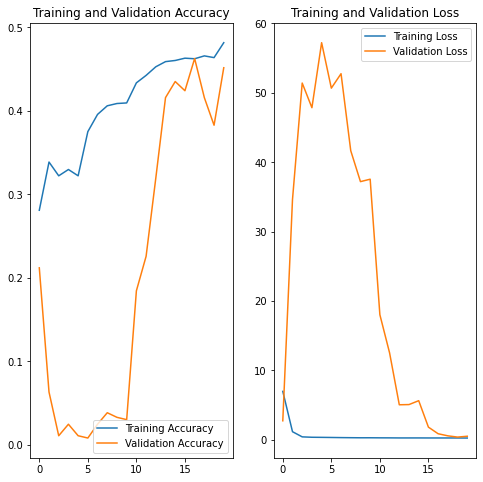

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs2)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Model 2 observation: Don't see much difference in accuracy, loss function between Model 1 and 2

# Check for class imbalance in data

In [ ]:
from sklearn.datasets import load_files   
from collections import Counter

def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    
    return files

train_filenames = load_data_raw(data_dir_train)

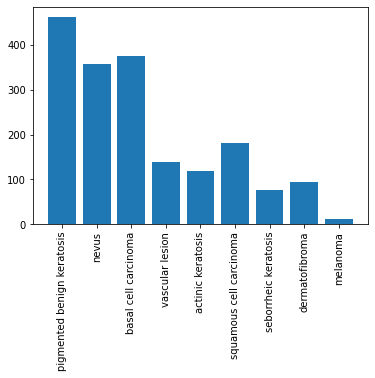

In [ ]:
filenames_trimmed = [filename.split('/')[-2] for filename in train_filenames]
classes_count = Counter(filenames_trimmed)

# Plot the classes
plt.bar(classes_count.keys(), classes_count.values())
plt.xticks(rotation="vertical")
plt.show()

- Which class has the least number of samples? Melanoma has the least number of samples
- Which classes dominate the data in terms proportionate number of samples? Pigmented benign keratosis dominates the data in terms of number of samples.

# Augmentor Library layer code

Model 3

In [ ]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path_to_training_dataset= 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability = 0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_left_right(probability=0.4)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 119 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFB0C943D50>: 100%|██████████| 500/500 [00:23<00:00, 21.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFB0C252C90>: 100%|██████████| 500/500 [00:22<00:00, 22.06 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFB0C183A90>: 100%|██████████| 500/500 [00:23<00:00, 21.22 Samples/s]


Initialised with 12 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7FFB0C9FDDD0>: 100%|██████████| 500/500 [03:52<00:00,  2.15 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFB088CDF50>: 100%|██████████| 500/500 [01:37<00:00,  5.11 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FFB0880B6D0>: 100%|██████████| 500/500 [00:23<00:00, 21.40 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FFB0C1A8490>: 100%|██████████| 500/500 [00:49<00:00, 10.14 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFB088E5450>: 100%|██████████| 500/500 [00:24<00:00, 20.23 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FFB088EC790>: 100%|██████████| 500/500 [00:23<00:00, 21.10 Samples/s]


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026857.jpg_fcfa50a0-4370-4c49-8a5f-78a9cb23e0ad.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026905.jpg_c74ab5e3-0c49-49e7-a937-d245df7f1e77.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030133.jpg_462a3419-79e2-4c4c-a5ec-bcb1aab48ad9.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025992.jpg_6d19bbca-531a-4e4e-9138-85b56b31d198.jpg',
 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
orig_dict = dict(zip(train_filenames, filenames_trimmed))
original_df = pd.DataFrame(list(orig_dict.items()), columns = ['Path','Label'])
original_df.head()

,Path,Label
0,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,pigmented benign keratosis
1,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,nevus
2,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,basal cell carcinoma
3,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,pigmented benign keratosis
4,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,vascular lesion


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])

In [ ]:
#df2.head()
new_df = original_df.append(df2)
new_df.head()

,Path,Label
0,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,pigmented benign keratosis
1,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,nevus
2,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,basal cell carcinoma
3,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,pigmented benign keratosis
4,gdrive/My Drive/Colab Notebooks/Skin cancer IS...,vascular lesion


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             619
dermatofibroma                595
seborrheic keratosis          577
melanoma                      512
Name: Label, dtype: int64

# Train the model on the data created using Augmentor

In [4]:
num_classes = 9
batch_size = 32
img_height = 180
img_width = 180

In [5]:
data_dir_train="gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6318 files belonging to 9 classes.
Using 5055 files for training.


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6318 files belonging to 9 classes.
Using 1263 files for validation.


In [7]:
# Model 3
model3 = Sequential()
model3.add(Rescaling(scale = 1./255, input_shape = (img_height,img_width,3))),
model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [8]:
### Todo, choose an appropirate optimiser and loss function
model3.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [9]:
# View the summary of all layers
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 178, 178, 32)      0         
                                                        

In [10]:
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs = 30
)

Epoch 1/30
158/158 [==============================] - 1202s 7s/step - loss: 17.7761 - accuracy: 0.2259 - val_loss: 59.8401 - val_accuracy: 0.1093
Epoch 2/30
158/158 [==============================] - 1074s 7s/step - loss: 2.1530 - accuracy: 0.1972 - val_loss: 55.3345 - val_accuracy: 0.1663
Epoch 3/30
158/158 [==============================] - 1078s 7s/step - loss: 2.1183 - accuracy: 0.2131 - val_loss: 21.4058 - val_accuracy: 0.2154
Epoch 4/30
158/158 [==============================] - 1075s 7s/step - loss: 2.0949 - accuracy: 0.2085 - val_loss: 2.2673 - val_accuracy: 0.2542
Epoch 5/30
158/158 [==============================] - 1090s 7s/step - loss: 2.0037 - accuracy: 0.2439 - val_loss: 2.1136 - val_accuracy: 0.2882
Epoch 6/30
158/158 [==============================] - 1083s 7s/step - loss: 1.9919 - accuracy: 0.2524 - val_loss: 1.9244 - val_accuracy: 0.3048
Epoch 7/30
158/158 [==============================] - 1076s 7s/step - loss: 1.9285 - accuracy: 0.2649 - val_loss: 1.9076 - val_accur

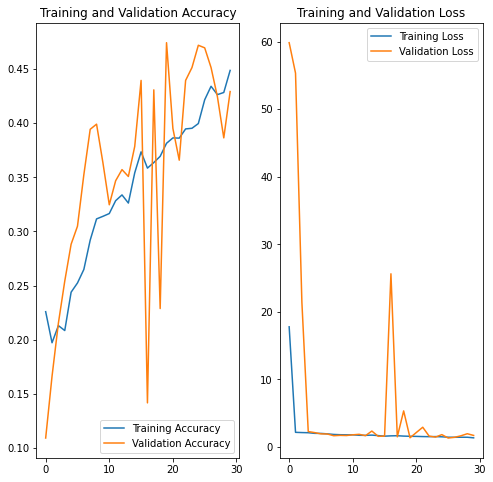

In [12]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1]:
# Model 3 observations:
    # 1. Accuracy between training and validation sets shows somewhat similar upword pattern now
    # 2. Loss function between traning and validation sets shows similar downward pattern, both training and validation loss 
        # plateus between 0 to 5 epochs